**Third exercise of third chapter of Hands-on Machine learning with Scikit-Learn, Keras, and Tensorflow.**

Find the book from → [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow (3rd edition)](https://homl.info/er3)

In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [1]:
from pathlib import Path
import pandas as pd
import os 
import tarfile
import urllib.request

# Load data

In [8]:
def load_titanic_dataset():
  tarball_path = Path("datasets/titanic.tgz")
  if not tarball_path.is_file():
    Path('datasets').mkdir(parents=True, exist_ok=True)
    url = 'https://homl.info/titanic.tgz'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as titanic_tarball:
      titanic_tarball.extractall(path='datasets')
    
    return pd.read_csv('datasets/titanic/train.csv'), pd.read_csv('datasets/titanic/test.csv')

In [9]:
titanic_train, titanic_test = load_titanic_dataset()

In [25]:
titanic_train = titanic_train.set_index('PassengerId')
titanic_test  = titanic_test.set_index('PassengerId')

# Get an Intuition about data 

In [26]:
titanic_train.shape

(891, 11)

In [27]:
titanic_test.shape

(418, 10)

In [28]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cabin
- Name
- Ticket


In [29]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
titanic_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [33]:
titanic_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [34]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

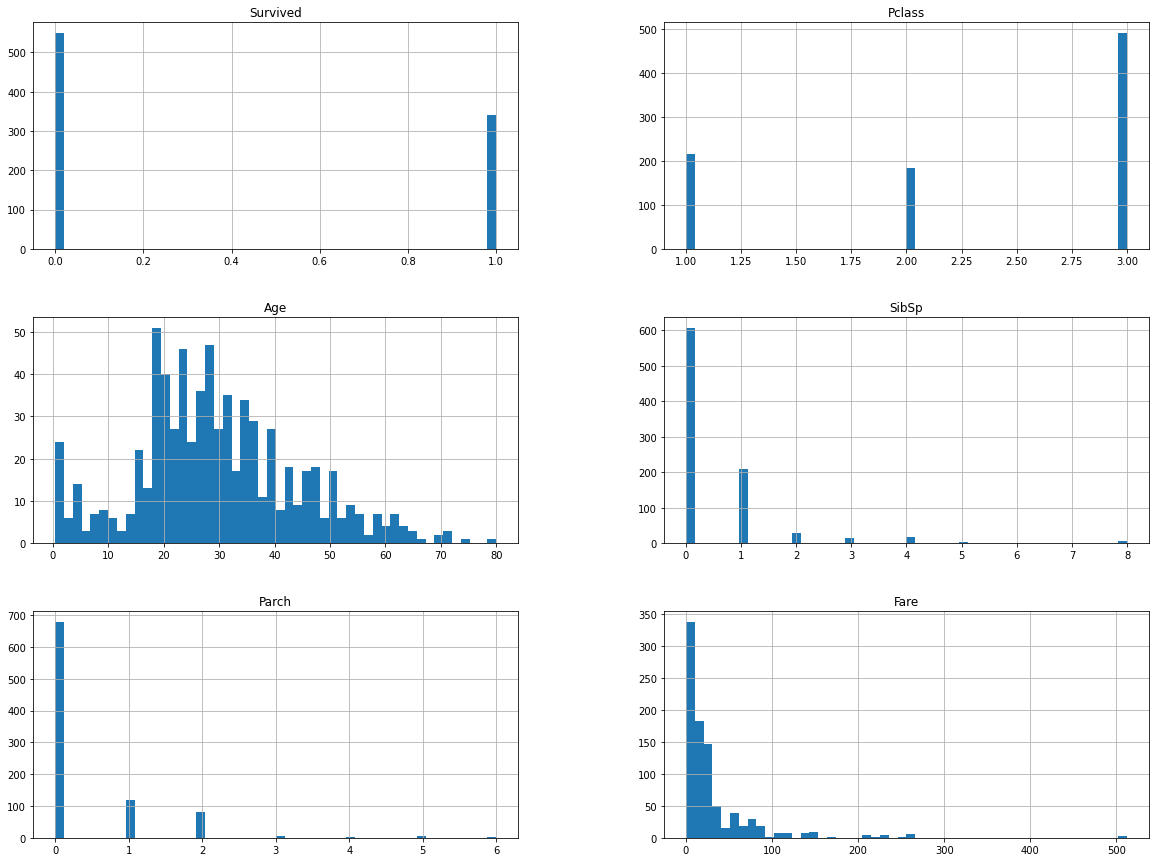

In [35]:
import matplotlib.pyplot as plt

titanic_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
corr_matrix = titanic_train.corr()

In [37]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

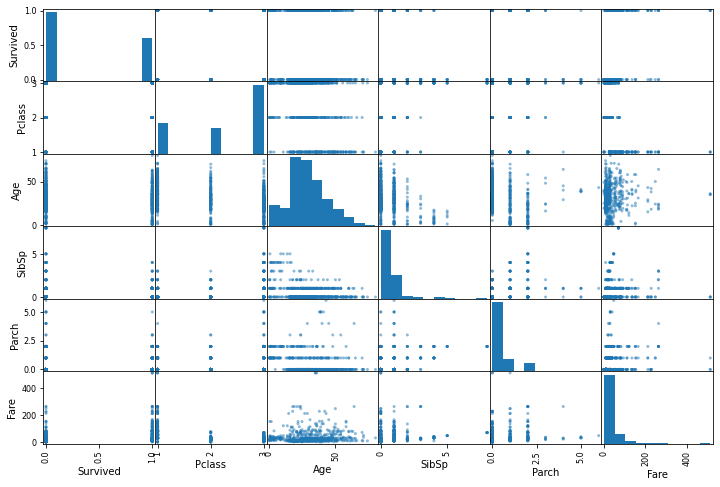

In [38]:
from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

scatter_matrix(titanic_train[attributes], figsize=(12, 8))
plt.show()

In [39]:
titanic_train[titanic_train['Sex'] == 'female']['Age'].median()

27.0

In [40]:
titanic_train[titanic_train['Sex'] == 'male']['Age'].median()

29.0

# Preprocessing

## Add new features

In [49]:
titanic_train['AgeBucket'] = titanic_train['Age'] // 15 * 15
titanic_train[['AgeBucket', 'Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [52]:
titanic_train['RelativesOnBoard'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train[['RelativesOnBoard', 'Survived']].groupby('RelativesOnBoard').mean()

,Survived
RelativesOnBoard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [53]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Age               714 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   Cabin             204 non-null    object 
 10  Embarked          889 non-null    object 
 11  AgeBucket         714 non-null    float64
 12  RelativesOnBoard  891 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 97.5+ KB


## Numerical Pipeline

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Categorical Pipeline

In [55]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

## All preprocessors in one

In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked']

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [57]:
X_train = preprocessing_pipeline.fit_transform(titanic_train)
X_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [58]:
y_train = titanic_train['Survived']

## RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=200, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [61]:
X_test = preprocessing_pipeline.transform(titanic_test)
# y_pred = forest_clf.predict(X_test)

In [62]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)

In [63]:
forest_scores.mean()

0.8115106117353308

## SVM classifier

In [64]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

In [66]:
svm_scores.mean()

0.8249313358302123

## SVC vs. RFC

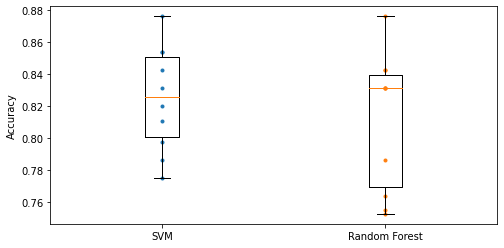

In [67]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")

plt.show()

## TODO:

- Compare many more models and tune hyperparameters using cross validation and grid search,
- Do more feature engineering, for example:
  - Try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).
  - Replace SibSp and Parch with their sum.
  - Try to identify parts of names that correlate well with the Survived attribute.
  - Use the Cabin column, for example take its first letter and treat it as a categorical attribute.
